Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9762 - loss: 0.5081 - val_accuracy: 1.0000 - val_loss: 0.1190
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9972 - loss: 0.0862 - val_accuracy: 1.0000 - val_loss: 0.0567
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9974 - loss: 0.0428 - val_accuracy: 0.9944 - val_loss: 0.0401
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9962 - loss: 0.0311 - val_accuracy: 0.9944 - val_loss: 0.0318
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9991 - loss: 0.0245 - val_accuracy: 1.0000 - val_loss: 0.0267
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9997 - loss: 0.0198 - val_accuracy: 1.0000 - val_loss: 0.0231
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9984 - loss: 0.0167 - val_accuracy: 1.0000 - val_loss: 0.0207
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9995 - loss: 0.0138 - val_accuracy: 1.0000 - val_

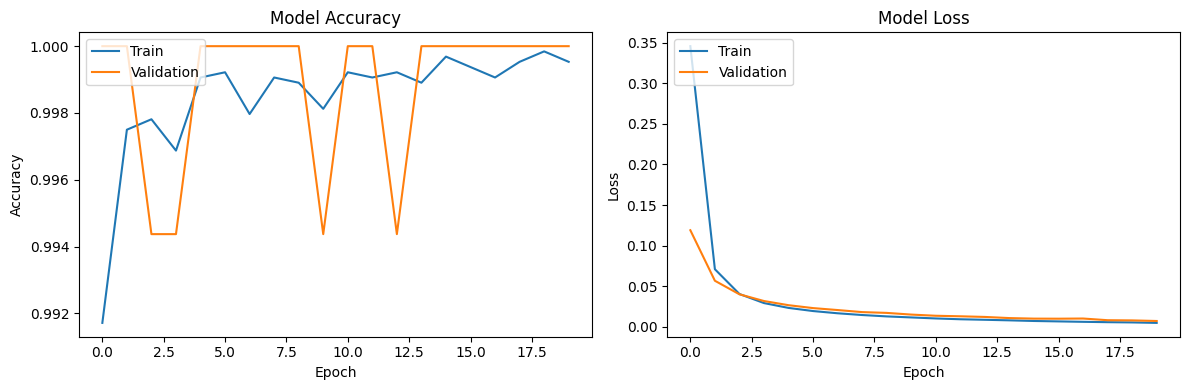

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Value: -50, Prediction: Negative (Confidence: 0.0000)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Value: -10, Prediction: Negative (Confidence: 0.0000)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Value: -1, Prediction: Negative (Confidence: 0.0699)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Value: 0, Prediction: Negative (Confidence: 0.2568)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Value: 1, Prediction: Positive (Confidence: 0.6136)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Value: 10, Prediction: Positive (Confidence: 0.9999)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Value: 50, Prediction: Positive (Confidence: 1.0000)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
n_samples = 10000

# Generate random integers between -100 and 100
X = np.random.randint(-100, 100, size=n_samples)

# Create labels: 1 for positive, 0 for negative
y = (X > 0).astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
X_train = X_train / 100.0  # Scale to [-1, 1]
X_test = X_test / 100.0

# Build the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(1,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

# Test with some examples
test_values = [-50, -10, -1, 0, 1, 10, 50]
for val in test_values:
    normalized_val = val / 100.0
    prediction = model.predict(np.array([normalized_val]))[0][0]
    result = "Positive" if prediction > 0.5 else "Negative"
    print(f"Value: {val}, Prediction: {result} (Confidence: {prediction:.4f})")

In [ ]:
# Interactive testing function
def test_value(value):
    normalized_val = value / 100.0
    prediction = model.predict(np.array([normalized_val]))[0][0]
    result = "Positive" if prediction > 0.5 else "Negative"
    print(f"Value: {value}, Prediction: {result} (Confidence: {prediction:.4f})")

# Test with user input
while True:
    user_input = input("Enter an integer to test (or 'quit' to exit): ")
    if user_input.lower() == 'quit':
        break
    try:
        test_value(int(user_input))
    except ValueError:
        print("Please enter a valid integer.")

Enter an integer to test (or 'quit' to exit): -20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Value: -20, Prediction: Negative (Confidence: 0.0000)
Enter an integer to test (or 'quit' to exit): 20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Value: 20, Prediction: Positive (Confidence: 1.0000)
Enter an integer to test (or 'quit' to exit): 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Value: 0, Prediction: Negative (Confidence: 0.2568)
Enter an integer to test (or 'quit' to exit): -0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Value: 0, Prediction: Negative (Confidence: 0.2568)
Enter an integer to test (or 'quit' to exit): +0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Value: 0, Prediction: Negative (Confidence: 0.2568)
Enter an integer to test (or 'quit' to exit): 63
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Value: 63, Prediction: Positive (Confidence: 1.0000)
Enter an integer to test (or 'quit' to exit): 60000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Value: 60000, Prediction: Positive (Confidence: 1.0000)
Enter an integer